In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = pd.read_csv("../djinni_scraper/jobs.csv")

In [5]:
df = pd.DataFrame(data)

In [6]:
df["technologies"] = df["technologies"].str.split(", ")
df_technologies = df.explode("technologies")

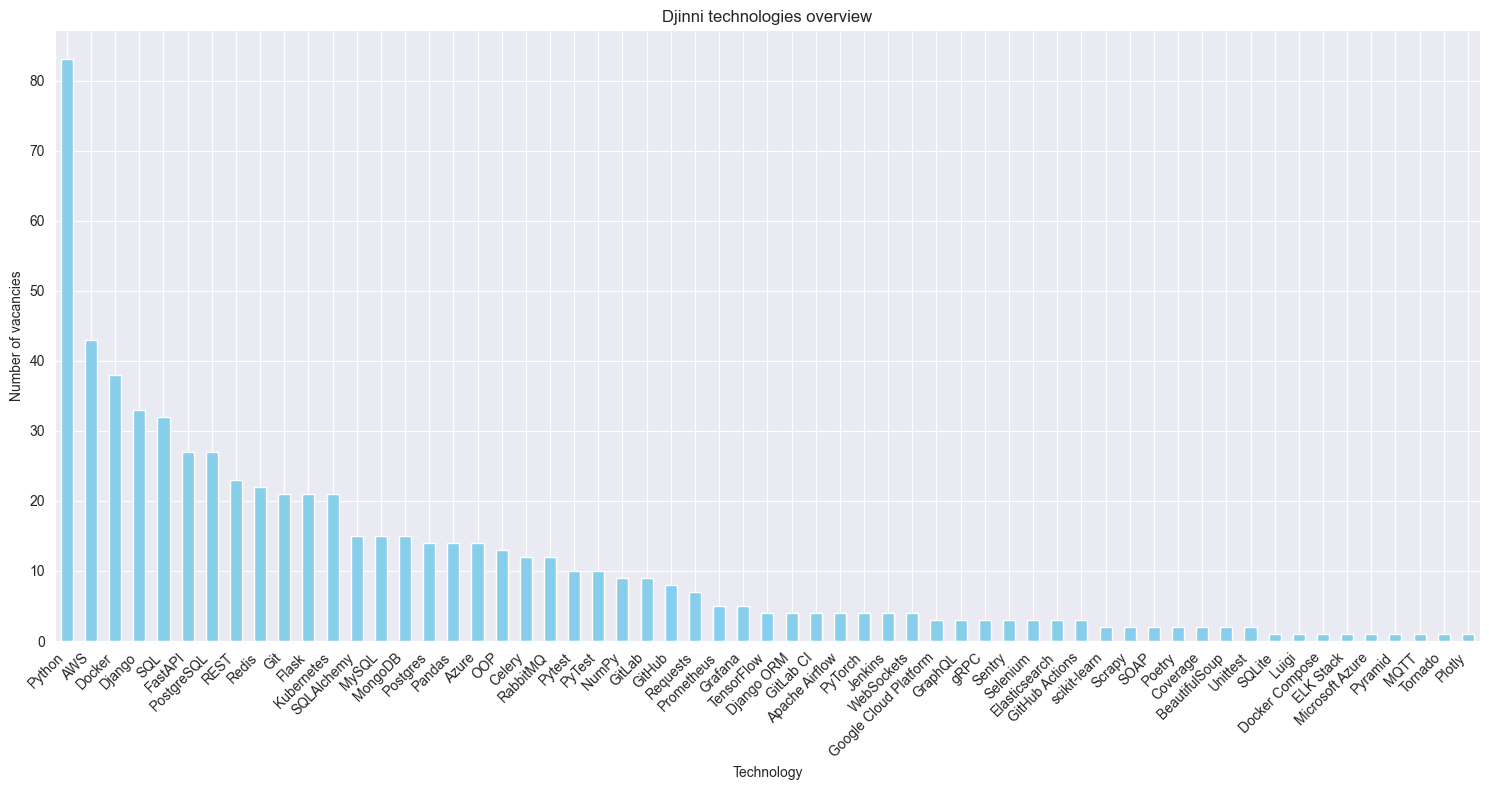

In [8]:
technology_counts = df_technologies["technologies"].value_counts()

plt.figure(figsize=(15, 8))
technology_counts.plot(kind="bar", color="skyblue")
plt.title("Djinni technologies overview")
plt.xlabel("Technology")
plt.ylabel("Number of vacancies")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("../images/technologies_histogram.png")
plt.show()

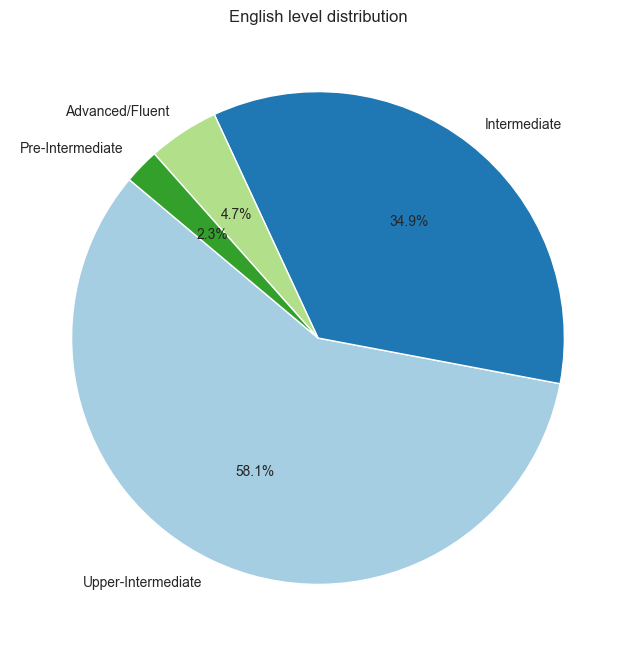

In [31]:
english_level_counts = df["english_level"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(
    english_level_counts,
    labels=english_level_counts.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=plt.cm.Paired(range(len(english_level_counts))),
)

plt.title("English level distribution")
plt.savefig("../images/english_lvl_pie.png")
plt.show()

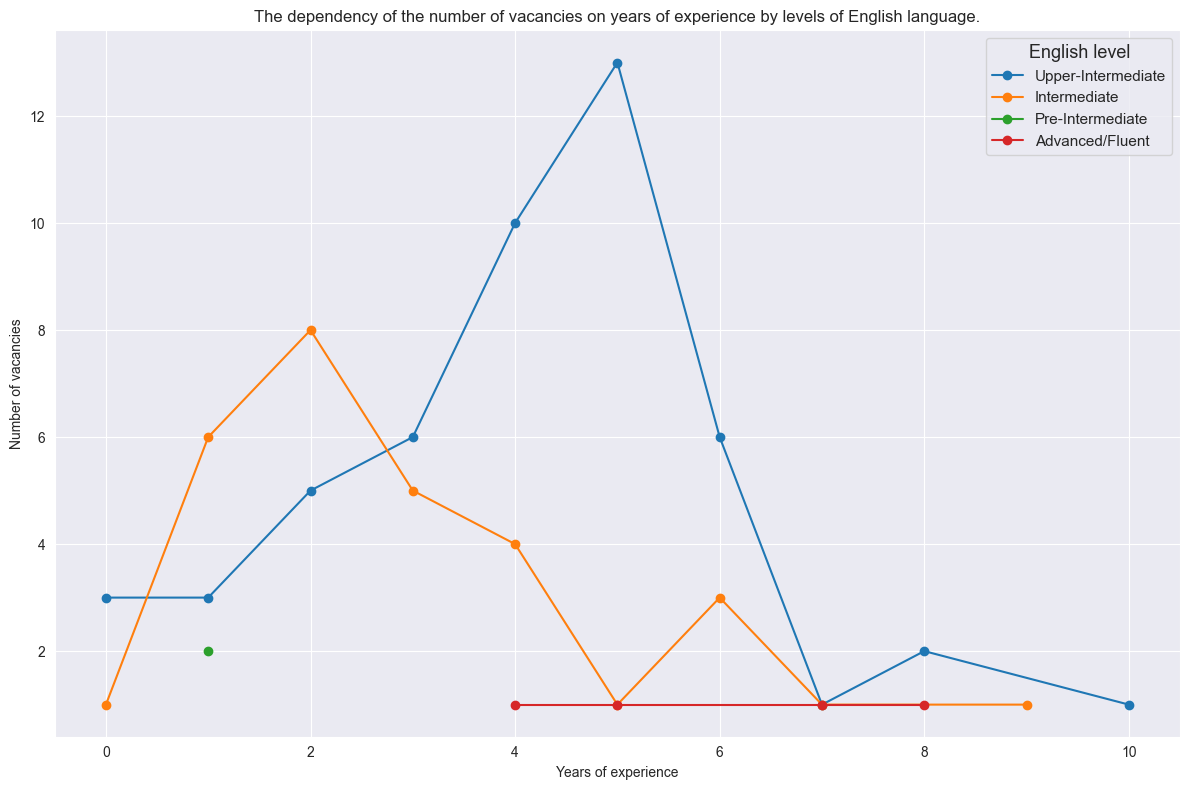

In [12]:
vacancy_count_df = (
    df.groupby(["experience_level", "english_level"])
    .size()
    .reset_index(name="vacancy_count")
)

df_merged = pd.merge(
    df, vacancy_count_df, on=["experience_level", "english_level"], how="left"
)

plt.figure(figsize=(12, 8))

for level in df["english_level"].unique():
    subset = df_merged[df_merged["english_level"] == level]
    vacancy_count_by_experience = (
        subset.groupby("experience_level")["vacancy_count"].mean().reset_index()
    )
    plt.plot(
        vacancy_count_by_experience["experience_level"],
        vacancy_count_by_experience["vacancy_count"],
        marker="o",
        label=level,
    )

plt.xlabel("Years of experience")
plt.ylabel("Number of vacancies")
plt.title(
    "The dependency of the number of vacancies on years of experience by levels of English language."
)
plt.legend(title="English level", title_fontsize="13", fontsize="11")
plt.grid(True)

plt.tight_layout()
plt.savefig("../images/english_lvl_by_exp_plot.png")
plt.show()

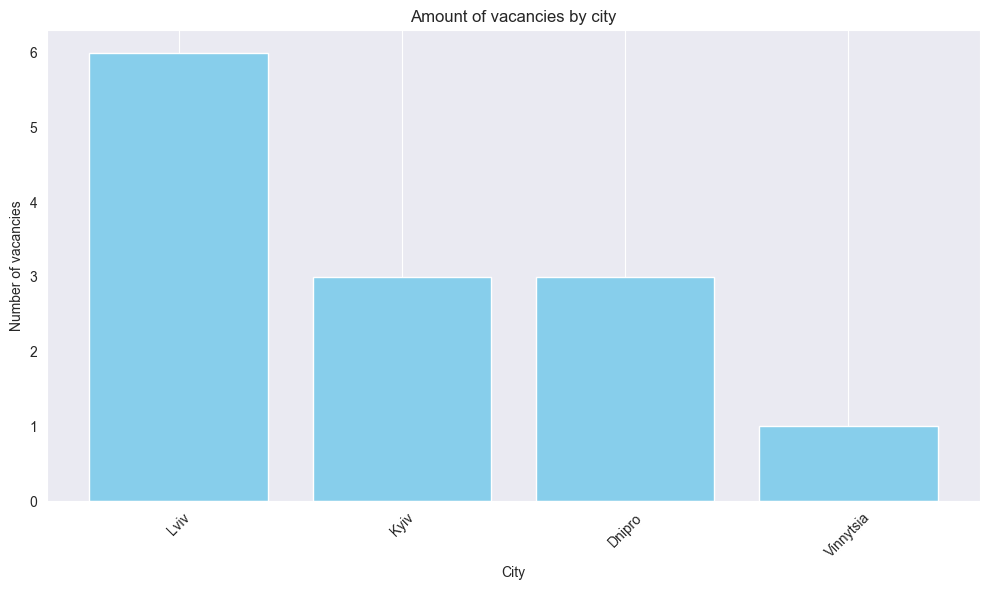

In [13]:
vacancy_count_by_city = df["city"].value_counts().reset_index()
vacancy_count_by_city.columns = ["city", "vacancy_count"]

plt.figure(figsize=(10, 6))
plt.bar(
    vacancy_count_by_city["city"],
    vacancy_count_by_city["vacancy_count"],
    color="skyblue",
)
plt.xlabel("City")
plt.ylabel("Number of vacancies")
plt.title("Amount of vacancies by city")
plt.xticks(rotation=45)
plt.grid(axis="y")

plt.tight_layout()
plt.savefig("../images/vacancies_by_city.png")
plt.show()

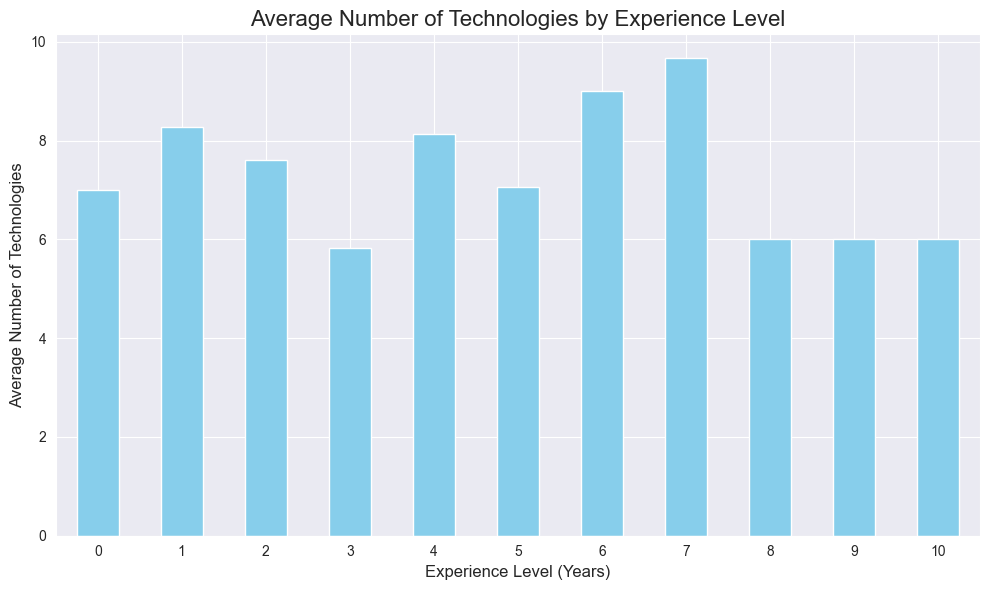

In [32]:
df["tech_count"] = df["technologies"].apply(
    lambda x: len(x) if isinstance(x, list) else 0
)
plt.figure(figsize=(10, 6))
df.groupby("experience_level")["tech_count"].mean().plot(kind="bar", color="skyblue")

plt.title("Average Number of Technologies by Experience Level", fontsize=16)
plt.xlabel("Experience Level (Years)", fontsize=12)
plt.ylabel("Average Number of Technologies", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

plt.savefig("../images/experience_vs_technology_count.png")
plt.show()